__Week 8 - Support Vector Machines__

__Exercise Answers__

In [2]:
%matplotlib inline

import os # locating directories

import numpy as np   # Arrays
import pandas as pd  # DataFrames

# Plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120
import seaborn as sns; sns.set()

from sklearn.datasets import load_iris           # for the Iris data
from IPython.display import Image                # displaying .png images
from sklearn.svm import SVC, LinearSVC           # SVM
from mpl_toolkits.mplot3d import Axes3D          # 3d plots
from sklearn.preprocessing import StandardScaler # scaling features
from sklearn.preprocessing import LabelEncoder   # binary encoding

# colours for print()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
image_dir = os.path.join(os.getcwd(),"Images")

iris = load_iris(as_frame=True)  # data stored in a `sklearn.utils.Bunch`
iris_df = iris['data']           # get features DataFrame
target = iris['target']          # get target Series
# get the labels of flowers capitalised for visualisation
target_names = list(map(lambda s: s.capitalize(), iris['target_names']))
# create a dictionary with the original labels decoded (inverse of LabelEncoder)
decode_label = dict(zip(range(3), target_names))
# make a label encoder to use later if needed
le = LabelEncoder().fit(target_names)
# add the target labels to df for visualisation purposes
iris_vis = pd.concat([iris_df, target],axis=1)
# turn the ints to labels
iris_vis["target"] = iris_vis["target"].replace(decode_label)
# Capitalize column names for plotting
iris_vis.columns = [x.capitalize() for x in list(iris_vis.columns)]

1. What is a support vector?

A support vector is...

2. In the plot below, which points are the "support vectors"?

It uses more than 1 here, although which ones are quite tricky to desern so dont worry if you got a few of the blue points wrong!

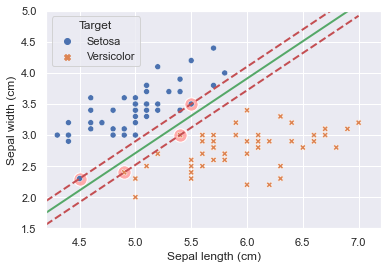

In [23]:
exersise_ = iris_vis[["Sepal length (cm)", "Sepal width (cm)", "Target"]]
exersise_ = exersise_[exersise_.Target != "Virginica"]

X = exersise_[["Sepal length (cm)", "Sepal width (cm)"]].values
y = le.transform(exersise_[["Target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
svc_decision_boundary(svm_clf, 4.2, 7, axes_limit = [4.2, 7.2, 1.5, 5]
                     )
g = sns.scatterplot(data=exersise_, x = "Sepal length (cm)", 
                y = "Sepal width (cm)", hue="Target", 
                style = "Target")

In [1]:
# Convert to pdf without code showing
!jupyter nbconvert ./Exercise_Answers.ipynb --to=pdf --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook ./Exercises.ipynb to pdf
[NbConvertApp] Support files will be in Exercises_files\
[NbConvertApp] Making directory .\Exercises_files
[NbConvertApp] Making directory .\Exercises_files
[NbConvertApp] Writing 46613 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 89517 bytes to Exercises.pdf
